<a href="https://colab.research.google.com/github/drewmanley16/drewmanley16/blob/main/Quant_Vasicek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

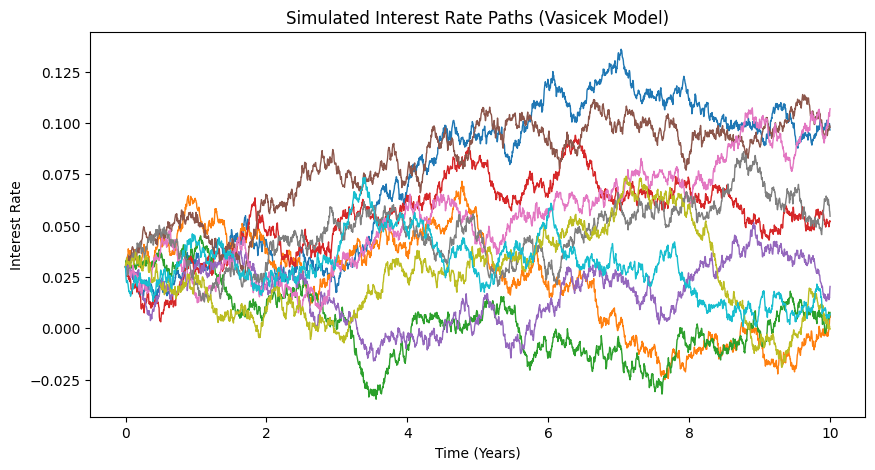

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek model parameters
theta = 0.15   # Speed of mean reversion
mu = 0.05      # Long-term mean interest rate (5%)
sigma = 0.02   # Volatility (2%)
r0 = 0.03      # Initial interest rate (3%)
T = 10         # Simulation period in years
dt = 1/252     # Time step (daily steps assuming 252 trading days per year)
N = int(T / dt)  # Number of time steps
simulations = 10 # Number of simulated interest rate paths

# Simulate interest rate paths
np.random.seed(42)
time_grid = np.linspace(0, T, N)
rates = np.zeros((simulations, N))
rates[:, 0] = r0  # Set initial rate

for i in range(simulations):
    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion
        rates[i, t] = rates[i, t-1] + theta * (mu - rates[i, t-1]) * dt + sigma * dW

# Plot results
plt.figure(figsize=(10,5))
for i in range(simulations):
    plt.plot(time_grid, rates[i], lw=1)
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Paths (Vasicek Model)")
plt.show()

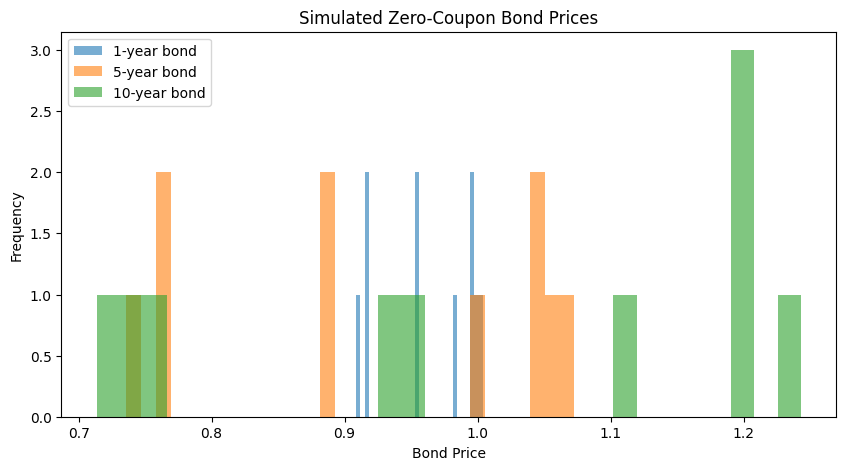

In [ ]:
def bond_price(r, T, t, theta, mu, sigma):
    """ Computes the price of a zero-coupon bond using the Vasicek model """
    B = (1 - np.exp(-theta * (T - t))) / theta
    A = (mu - (sigma**2 / (2 * theta**2))) * (B - (T - t)) - (sigma**2 * B**2) / (4 * theta)
    return np.exp(-A - B * r)

# Example: Compute bond prices at different maturities using simulated rates
maturities = [1, 5, 10]  # 1-year, 5-year, 10-year bonds
bond_prices = {T: [] for T in maturities}

for T in maturities:
    for i in range(simulations):
        bond_prices[T].append(bond_price(rates[i, -1], T, 0, theta, mu, sigma))

# Plot bond price distributions
plt.figure(figsize=(10,5))
for T in maturities:
    plt.hist(bond_prices[T], bins=30, alpha=0.6, label=f"{T}-year bond")
plt.xlabel("Bond Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Simulated Zero-Coupon Bond Prices")
plt.show()

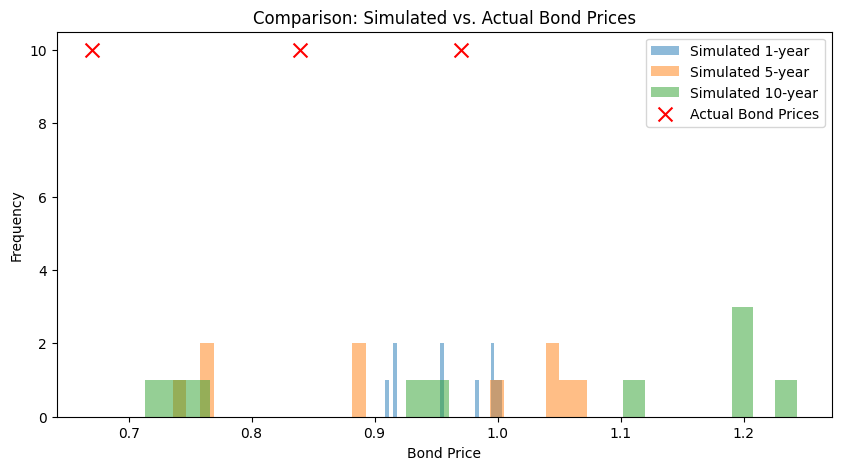

In [ ]:
# Example: Using historical Treasury yields
real_rates = [0.03, 0.035, 0.04]  # Example 1-year, 5-year, and 10-year yields
historical_prices = [np.exp(-r*T) for r, T in zip(real_rates, maturities)]

# Plot comparison
plt.figure(figsize=(10,5))
for T in maturities:
    plt.hist(bond_prices[T], bins=30, alpha=0.5, label=f"Simulated {T}-year")
plt.scatter(historical_prices, [10, 10, 10], color='red', label="Actual Bond Prices", marker='x', s=100)
plt.xlabel("Bond Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison: Simulated vs. Actual Bond Prices")
plt.show()

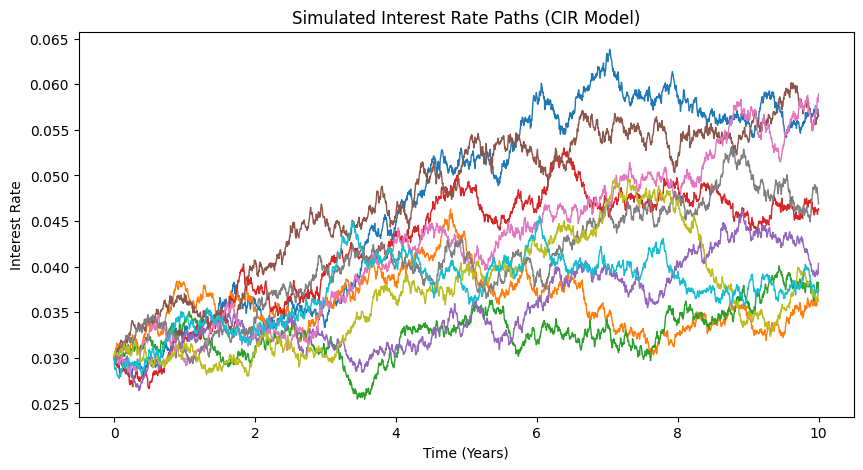

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# CIR model parameters
theta = 0.15   # Speed of mean reversion
mu = 0.05      # Long-term mean rate
sigma = 0.02   # Volatility
r0 = 0.03      # Initial rate
T = 10         # Time in years
dt = 1/252     # Daily time step
N = int(T / dt)
simulations = 10

# Simulate CIR interest rate paths
np.random.seed(42)
time_grid = np.linspace(0, T, N)
rates = np.zeros((simulations, N))
rates[:, 0] = r0

for i in range(simulations):
    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        rates[i, t] = max(rates[i, t-1] + theta * (mu - rates[i, t-1]) * dt + sigma * np.sqrt(rates[i, t-1]) * dW, 0)

# Plot results
plt.figure(figsize=(10,5))
for i in range(simulations):
    plt.plot(time_grid, rates[i], lw=1)
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Paths (CIR Model)")
plt.show()


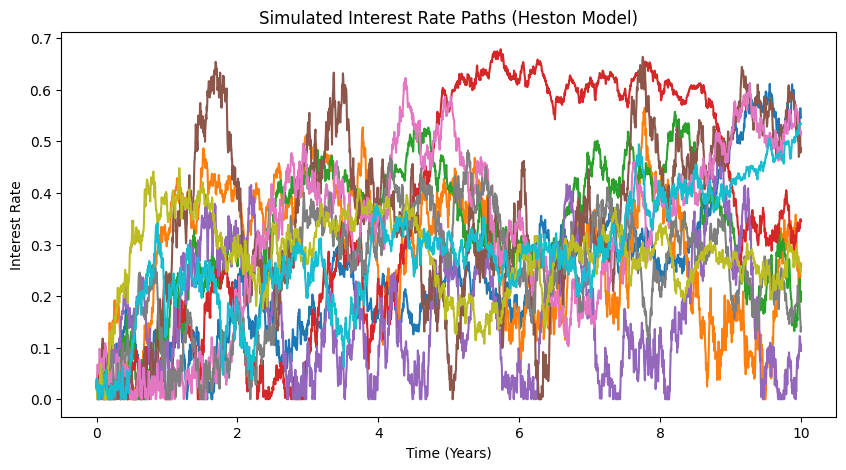

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
kappa = 0.3  # Mean reversion speed for volatility
eta = 0.04   # Long-term variance level
xi = 0.1     # Volatility of volatility
rho = -0.6   # Correlation between rate and volatility shocks
theta = 0.1  # Mean reversion speed for interest rate
mu = 0.05    # Long-term mean interest rate
r0 = 0.03    # Initial interest rate
N = 2520     # Number of time steps
dt = 1/252   # Time step size
num_paths = 10  # Number of paths to simulate

# Time grid
time_grid = np.linspace(0, N*dt, N)

# Function to simulate one path
def simulate_path():
    r = np.zeros(N)
    v = np.zeros(N)
    r[0] = r0
    v[0] = eta  # Initial variance

    for t in range(1, N):
        dW_r = np.random.normal(0, np.sqrt(dt))
        dW_v = np.random.normal(0, np.sqrt(dt))

        dW_v = rho * dW_r + np.sqrt(1 - rho**2) * dW_v  # Correlated Brownian motions

        v[t] = np.abs(v[t-1] + kappa * (eta - v[t-1]) * dt + xi * np.sqrt(v[t-1]) * dW_v)  # Ensure positivity
        r[t] = max(r[t-1] + theta * (mu - r[t-1]) * dt + np.sqrt(v[t-1]) * dW_r, 0)  # Ensure non-negative rates

    return r

# Simulate multiple paths
all_paths = np.zeros((num_paths, N))
for i in range(num_paths):
    all_paths[i] = simulate_path()

# Plot interest rate paths
plt.figure(figsize=(10, 5))
for i in range(num_paths):
    plt.plot(time_grid, all_paths[i], label=f"Path {i+1}")

plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Interest Rate Paths (Heston Model)")
plt.show()

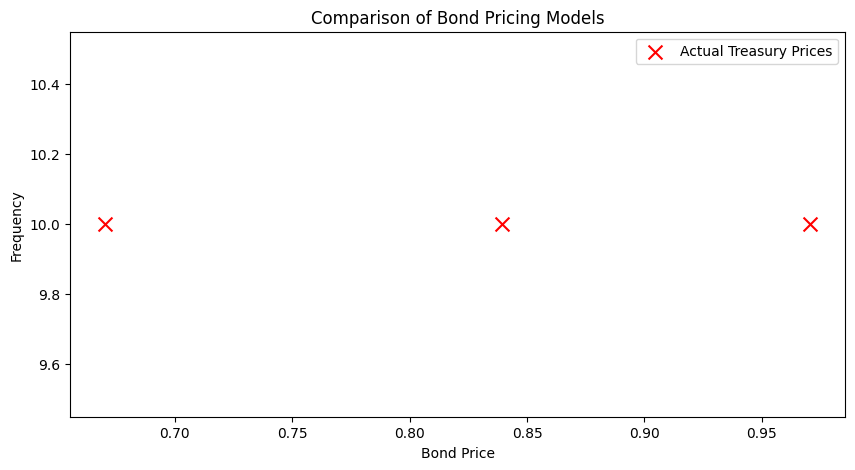

In [ ]:
plt.figure(figsize=(10,5))
# plt.hist(bond_prices_cir, bins=30, alpha=0.5, label="CIR Model")
# plt.hist(bond_prices_heston, bins=30, alpha=0.5, label="Heston Model")
plt.scatter(historical_prices, [10, 10, 10], color='red', marker='x', label="Actual Treasury Prices", s=100)
plt.xlabel("Bond Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison of Bond Pricing Models")
plt.show()

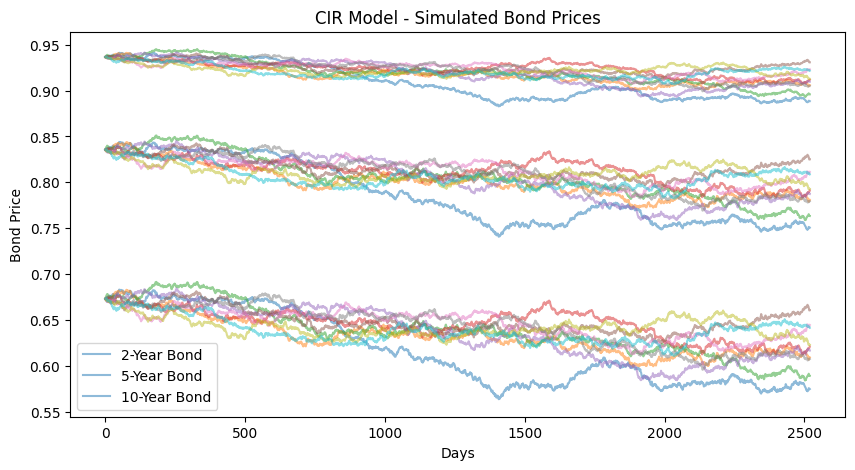

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# CIR Model Parameters
theta = 0.15  # Speed of mean reversion
mu = 0.05  # Long-term mean rate
sigma = 0.02  # Volatility
r0 = 0.03  # Initial short rate
T = 10  # Maturity in years
dt = 1/252  # Daily time step
N = int(T / dt)
maturities = [2, 5, 10]  # Bond maturities
num_simulations = 10  # Number of simulations

# Function to simulate CIR model and compute bond prices
def simulate_cir():
    rates = np.zeros(N)
    rates[0] = r0
    bond_prices_cir = {m: [] for m in maturities}

    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        rates[t] = max(rates[t-1] + theta * (mu - rates[t-1]) * dt + sigma * np.sqrt(rates[t-1]) * dW, 0)

    for T in maturities:
        tau = T  # Time to maturity
        gamma = np.sqrt(theta**2 + 2*sigma**2)

        B_tau = (1 - np.exp(-theta * tau)) / theta
        A_tau = ((2 * gamma * np.exp((theta + gamma) * tau / 2)) /
                 ((theta + gamma) * (np.exp(gamma * tau) - 1) + 2 * gamma)) ** (2 * theta * mu / sigma**2)

        bond_prices_cir[T] = A_tau * np.exp(-B_tau * rates)

    return bond_prices_cir

# Run multiple simulations
all_bond_prices = {m: [] for m in maturities}
for _ in range(num_simulations):
    bond_prices = simulate_cir()
    for T in maturities:
        all_bond_prices[T].append(bond_prices[T])

# Plot bond prices for different maturities
plt.figure(figsize=(10, 5))
for T in maturities:
    for i in range(num_simulations):
        plt.plot(all_bond_prices[T][i], label=f"{T}-Year Bond" if i == 0 else "", alpha=0.5)
plt.xlabel("Days")
plt.ylabel("Bond Price")
plt.title("CIR Model - Simulated Bond Prices")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving daily-treasury-rates.csv to daily-treasury-rates.csv


        Date  2 Yr  5 Yr  10 Yr  2Y Price  5Y Price  10Y Price
0 2025-03-03  3.96  3.97   4.16  0.923855   0.81996    0.65968
(1, 7)
Index(['Date', '2 Yr', '5 Yr', '10 Yr', '2Y Price', '5Y Price', '10Y Price'], dtype='object')


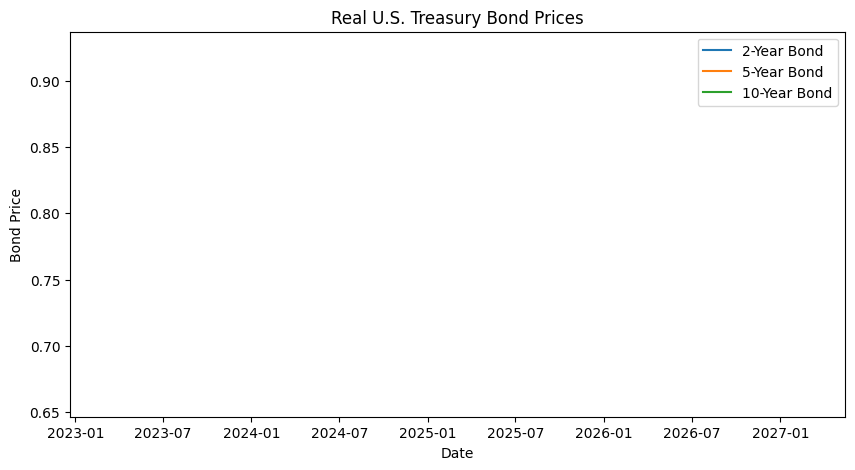

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Treasury Yield Data (Example CSV from Treasury Website)
df = pd.read_csv("daily-treasury-rates.csv")

# Select Relevant Maturities
df = df[['Date', '2 Yr', '5 Yr', '10 Yr']]
df['Date'] = pd.to_datetime(df['Date'])

# Convert Yields to Prices (Zero-Coupon Approximation)
df['2Y Price'] = np.exp(-df['2 Yr'] / 100 * 2)
df['5Y Price'] = np.exp(-df['5 Yr'] / 100 * 5)
df['10Y Price'] = np.exp(-df['10 Yr'] / 100 * 10)

print(df.head())  # Show first few rows
print(df.shape)   # Show dataset size
print(df.columns) # Check column names

# Plot Real Bond Prices
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['2Y Price'], label="2-Year Bond")
plt.plot(df['Date'], df['5Y Price'], label="5-Year Bond")
plt.plot(df['Date'], df['10Y Price'], label="10-Year Bond")
plt.xlabel("Date")
plt.ylabel("Bond Price")
plt.title("Real U.S. Treasury Bond Prices")
plt.legend()
plt.show()

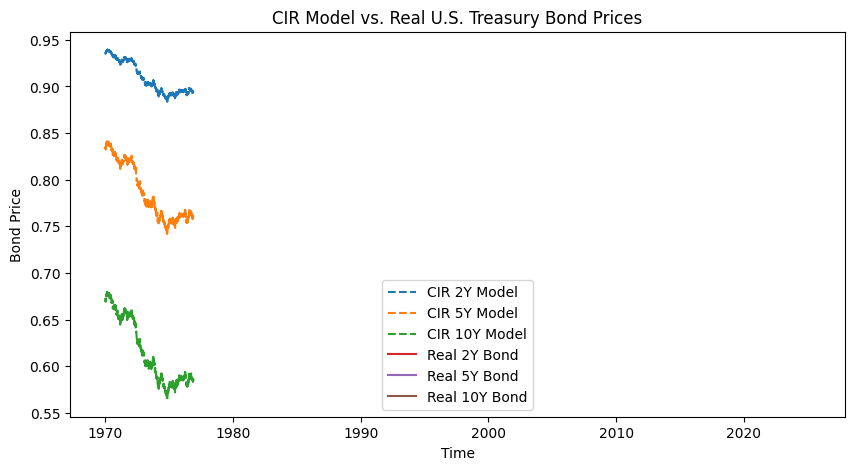

In [ ]:
# Plot CIR vs. Real Data
plt.figure(figsize=(10,5))
plt.plot(bond_prices_cir[2], label="CIR 2Y Model", linestyle="dashed")
plt.plot(bond_prices_cir[5], label="CIR 5Y Model", linestyle="dashed")
plt.plot(bond_prices_cir[10], label="CIR 10Y Model", linestyle="dashed")

plt.plot(df['Date'], df['2Y Price'], label="Real 2Y Bond")
plt.plot(df['Date'], df['5Y Price'], label="Real 5Y Bond")
plt.plot(df['Date'], df['10Y Price'], label="Real 10Y Bond")

plt.xlabel("Time")
plt.ylabel("Bond Price")
plt.title("CIR Model vs. Real U.S. Treasury Bond Prices")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_2y = mean_squared_error(df['2Y Price'], bond_prices_cir[2][:len(df)])
mse_5y = mean_squared_error(df['5Y Price'], bond_prices_cir[5][:len(df)])
mse_10y = mean_squared_error(df['10Y Price'], bond_prices_cir[10][:len(df)])

r2_2y = r2_score(df['2Y Price'], bond_prices_cir[2][:len(df)])
r2_5y = r2_score(df['5Y Price'], bond_prices_cir[5][:len(df)])
r2_10y = r2_score(df['10Y Price'], bond_prices_cir[10][:len(df)])

print(f"2Y Bond: MSE = {mse_2y:.4f}, R^2 = {r2_2y:.4f}")
print(f"5Y Bond: MSE = {mse_5y:.4f}, R^2 = {r2_5y:.4f}")
print(f"10Y Bond: MSE = {mse_10y:.4f}, R^2 = {r2_10y:.4f}")

2Y Bond: MSE = 0.0002, R^2 = nan
5Y Bond: MSE = 0.0002, R^2 = nan
10Y Bond: MSE = 0.0002, R^2 = nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Date     0
2 Yr     0
5 Yr     0
10 Yr    0
dtype: int64
2 Yr     float64
5 Yr     float64
10 Yr    float64
dtype: object
2Y Price     0
5Y Price     0
10Y Price    0
dtype: int64
        Date  2 Yr  5 Yr  10 Yr    2Y Price    5Y Price   10Y Price
0 2025-03-03  3.96  3.97   4.16  944.139583  912.225139  906.658558


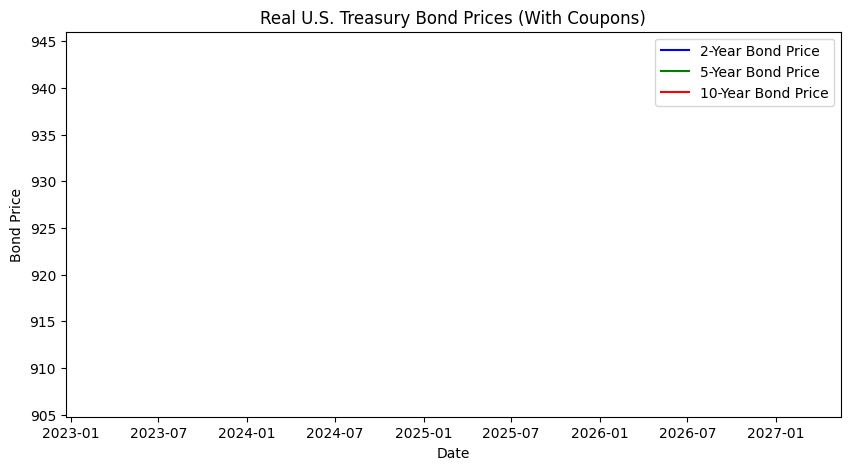

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Treasury Yield Data (Example CSV from Treasury Website)
df = pd.read_csv("daily-treasury-rates.csv")

# Check for any missing or non-numeric values in the yields columns
print(df[['Date', '2 Yr', '5 Yr', '10 Yr']].isnull().sum())
print(df[['2 Yr', '5 Yr', '10 Yr']].dtypes)

# Select Relevant Maturities (with corresponding yields)
df = df[['Date', '2 Yr', '5 Yr', '10 Yr']]
df['Date'] = pd.to_datetime(df['Date'])

# Assumed Coupon Rates (You would need actual coupon rates for real bonds)
coupon_rates = {
    '2Y': 0.01,  # Assumed 1% coupon for 2Y bond
    '5Y': 0.02,  # Assumed 2% coupon for 5Y bond
    '10Y': 0.03, # Assumed 3% coupon for 10Y bond
}

# Assumed Face Value
face_value = 1000

# Function to Calculate Bond Price Using Coupon Bond Formula
def bond_price(yield_rate, maturity, coupon_rate, face_value=1000):
    price = 0
    for t in range(1, maturity + 1):
        price += (coupon_rate * face_value) / (1 + yield_rate / 100) ** t
    price += face_value / (1 + yield_rate / 100) ** maturity
    return price

# Check that yields are being processed correctly
df['2Y Price'] = df['2 Yr'].apply(lambda x: bond_price(x, 2, coupon_rates['2Y']) if pd.notnull(x) else np.nan)
df['5Y Price'] = df['5 Yr'].apply(lambda x: bond_price(x, 5, coupon_rates['5Y']) if pd.notnull(x) else np.nan)
df['10Y Price'] = df['10 Yr'].apply(lambda x: bond_price(x, 10, coupon_rates['10Y']) if pd.notnull(x) else np.nan)

# Check for any NaN values in bond price columns
print(df[['2Y Price', '5Y Price', '10Y Price']].isnull().sum())

# Check the first few rows of the DataFrame to confirm calculations
print(df.head())

# Plot Bond Prices
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['2Y Price'], label="2-Year Bond Price", color='blue')
plt.plot(df['Date'], df['5Y Price'], label="5-Year Bond Price", color='green')
plt.plot(df['Date'], df['10Y Price'], label="10-Year Bond Price", color='red')
plt.xlabel("Date")
plt.ylabel("Bond Price")
plt.title("Real U.S. Treasury Bond Prices (With Coupons)")
plt.legend()
plt.show()

        Date  2 Yr  5 Yr  10 Yr   2Y Price   5Y Price  10Y Price
0 2025-03-03  3.96  3.97   4.16  92.526782  82.311361  66.525828


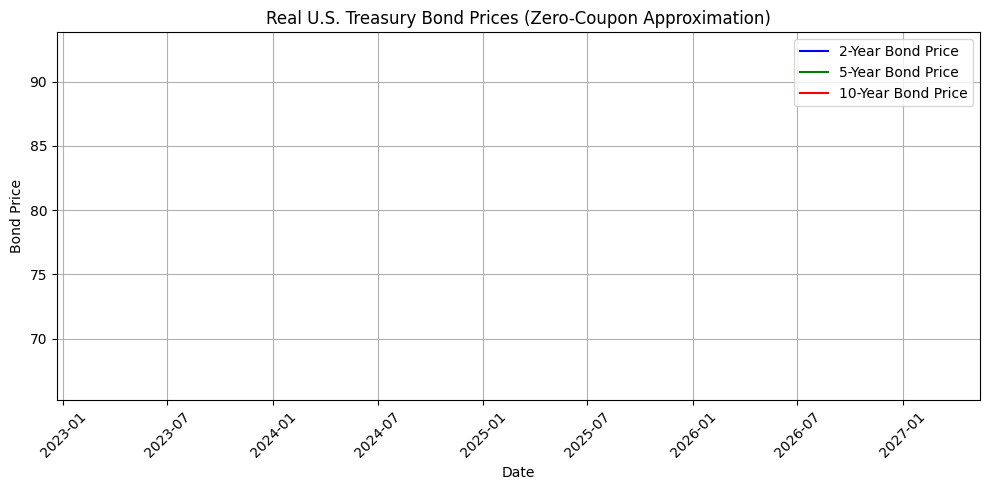

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Treasury Yield Data (Example CSV from Treasury Website)
df = pd.read_csv("daily-treasury-rates.csv")

# Select Relevant Maturities
df = df[['Date', '2 Yr', '5 Yr', '10 Yr']]
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Zero-Coupon Bond Prices
df['2Y Price'] = 100 / (1 + df['2 Yr'] / 100)**2
df['5Y Price'] = 100 / (1 + df['5 Yr'] / 100)**5
df['10Y Price'] = 100 / (1 + df['10 Yr'] / 100)**10

# Check the first few rows of the data
print(df.head())

# Plot Bond Prices
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['2Y Price'], label="2-Year Bond Price", color='blue')
plt.plot(df['Date'], df['5Y Price'], label="5-Year Bond Price", color='green')
plt.plot(df['Date'], df['10Y Price'], label="10-Year Bond Price", color='red')
plt.xlabel("Date")
plt.ylabel("Bond Price")
plt.title("Real U.S. Treasury Bond Prices (Zero-Coupon Approximation)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.tight_layout()  # Adjust plot to fit labels and title
plt.show()